## **Libraries**

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
import zipfile
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

## **Data Cleaning**

In [13]:
df = pd.read_csv('/content/stock_details_5_years.csv')
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df.set_index('Date', inplace=True)
df = df[~df.index.duplicated(keep='first')]
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 2018-11-29 00:00:00-05:00 to 2021-09-30 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          714 non-null    float64
 1   High          714 non-null    float64
 2   Low           714 non-null    float64
 3   Close         714 non-null    float64
 4   Volume        714 non-null    float64
 5   Dividends     714 non-null    float64
 6   Stock Splits  714 non-null    float64
 7   Company       714 non-null    object 
dtypes: float64(7), object(1)
memory usage: 50.2+ KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,714.000000,714.000000,714.000000,714.000000,7.140000e+02,714.000000,714.000000
mean,87.078234,88.087226,86.081542,87.127087,1.248614e+08,0.003099,0.005602
std,36.558276,36.908857,36.095510,36.498468,5.939829e+07,0.024830,0.149696
min,34.548387,34.965906,34.073282,34.118874,4.544800e+07,0.000000,0.000000
25%,50.570038,50.979315,50.151637,50.562370,8.576792e+07,0.000000,0.000000
50%,77.568521,78.246260,77.080523,77.704750,1.091248e+08,0.000000,0.000000
75%,122.652855,124.028573,121.091436,122.823561,1.461266e+08,0.000000,0.000000
max,154.980484,155.256885,152.423446,154.694153,4.265100e+08,0.220000,4.000000


## **Trends for last 5 years**

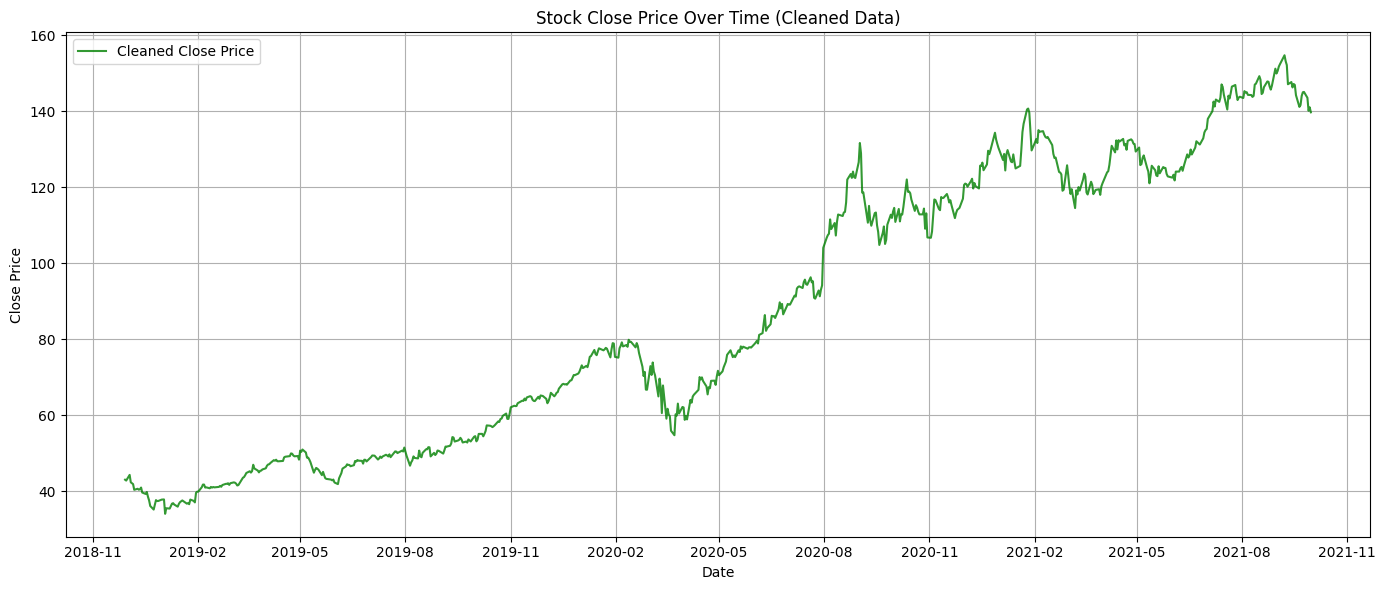

In [14]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df = df.set_index('Date')

# Plot the 'Close' price
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Cleaned Close Price', color='green', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time (Cleaned Data)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **P-Value Checking**

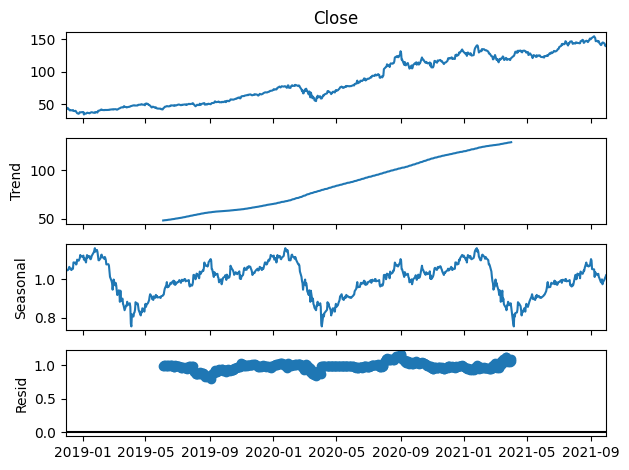

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=252)
decomposition.plot()
plt.tight_layout()
plt.show()

## **ADF Test**

In [16]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
warnings.filterwarnings('ignore')
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1] < 0.05
df['Close_diff'] = df['Close'].diff().dropna()

## **ARIMA**


In [17]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df = df.set_index('Date')
    df = df.asfreq('D')
if df['Close'].isnull().any():
    df['Close'] = df['Close'].fillna(method='ffill')

my_series = df['Close']

# Fit ARIMA model
model = ARIMA(my_series, order=(1,1,1))
model_fit = model.fit()

# Predict next 5 days
forecast = model_fit.forecast(steps=5)
print("Next 5 days predicted prices:\n", forecast)


Next 5 days predicted prices:
 714    139.903302
715    139.816836
716    139.853187
717    139.837905
718    139.844330
Name: predicted_mean, dtype: float64


## **SARIMA**

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')
model = SARIMAX(df['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

# Predict next 5 days
forecast = model_fit.forecast(steps=5)
print("Next 5 days predicted prices:\n", forecast)



Next 5 days predicted prices:
 714    139.975939
715    140.364820
716    140.478936
717    140.358633
718    140.802747
Name: predicted_mean, dtype: float64


## **Prophet Modelling**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4lmfz72o/oqun7ynh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4lmfz72o/9_tjksbj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33642', 'data', 'file=/tmp/tmp4lmfz72o/oqun7ynh.json', 'init=/tmp/tmp4lmfz72o/9_tjksbj.json', 'output', 'file=/tmp/tmp4lmfz72o/prophet_modelcxlrj482/prophet_model-20250930085009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:50:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:50:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Next 5 days predicted prices:
             ds        yhat
242 2021-03-13  126.793438
243 2021-03-14  125.730037
244 2021-03-15  115.866075
245 2021-03-16  114.988621
246 2021-03-17  113.717190


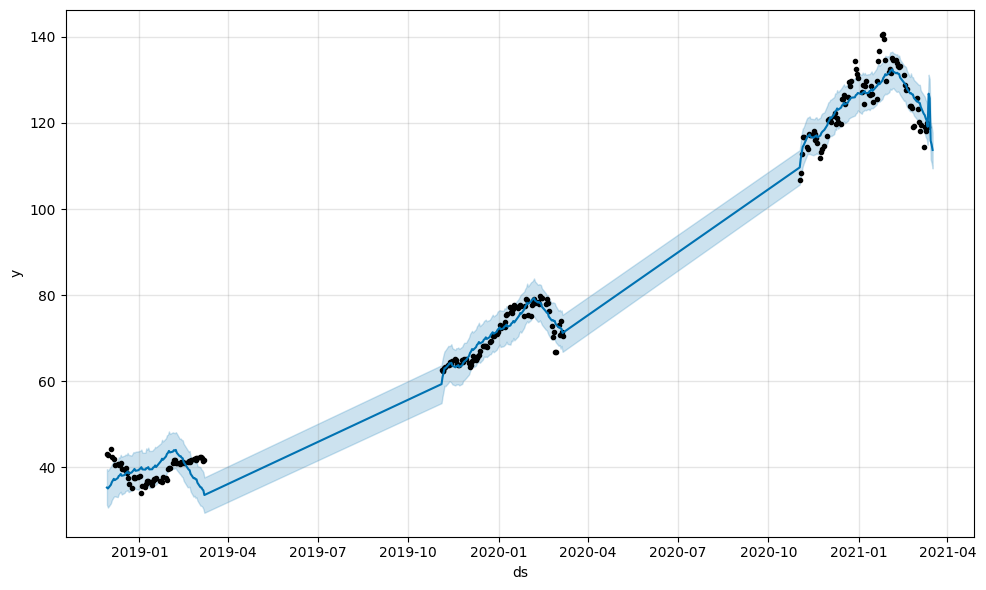

In [21]:
import pandas as pd
from prophet import Prophet
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Ensure 'Date' is datetime and set as index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df = df.set_index('Date')
    # Set frequency to daily
    df = df.asfreq('D')
if df['Close'].isnull().any():
    df['Close'] = df['Close'].fillna(method='ffill')

# Prepare data for Prophet
prophet_df = df.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
# Ensure 'ds' (date) column is timezone-naive
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], errors='coerce').dt.tz_localize(None)
prophet_df = prophet_df.dropna(subset=['ds'])  # Drop bad rows if any

# Fit the Prophet model to all available data
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
prophet_model.fit(prophet_df)

# Predict next 5 days
future_dates = prophet_model.make_future_dataframe(periods=5, freq='D')
prophet_forecast = prophet_model.predict(future_dates)

# Show only the next 5 predicted days (not historical fit)
next_5 = prophet_forecast.tail(5)[['ds', 'yhat']]
print("Next 5 days predicted prices:\n", next_5)

# Optional: Plot the forecast including the next 5 days
fig = prophet_model.plot(prophet_forecast)
plt.show()


## **LSTM**

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Scale data
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_close, seq_length)

# Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Predict
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

# Evaluation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_inv, pred)
print('LSTM MSE:', mse)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0840 - val_loss: 0.0144
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0073 - val_loss: 0.0058
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have 'df', a DataFrame with 'Close' prices

# Scaling and sequence creation (should already be done in modeling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Use last 60 values to predict next 5
lookback = 60
future_steps = 5
last_sequence = scaled_close[-lookback:].reshape(1, lookback, 1)
future_preds = []

for _ in range(future_steps):
    pred = model.predict(last_sequence)
    future_preds.append(pred[0,0])
    # Remove oldest entry, add new prediction at end
    new_seq = np.concatenate((last_sequence[:,1:,:], pred.reshape(1,1,1)), axis=1)
    last_sequence = new_seq

# Inverse transform
future_preds_inv = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1)).flatten()
print("Next 5 predicted prices:\n", future_preds_inv)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Next 5 predicted prices:
 [142.13976 141.72499 141.39337 141.12209 140.89381]


## **Model Comparision**

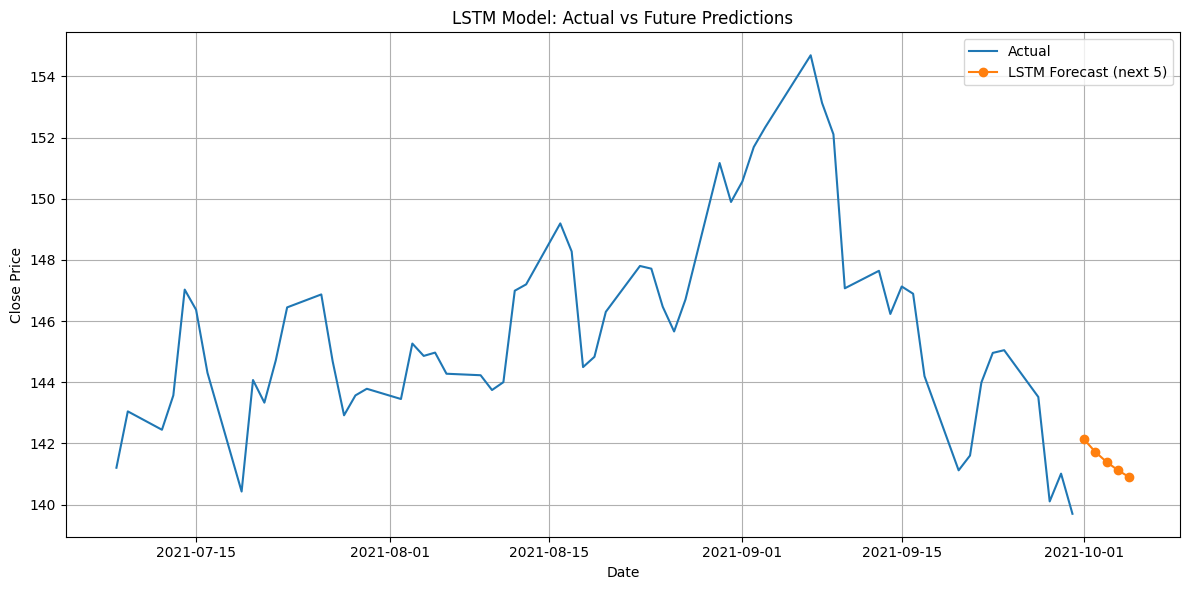

In [26]:
import pandas as pd

# Prepare the dates for the next 5 predictions
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Combine last part of actual data and future predictions for plot
actual_dates = df.index[-lookback:]

plt.figure(figsize=(12,6))
plt.plot(actual_dates, scaler.inverse_transform(scaled_close[-lookback:]), label='Actual')
plt.plot(future_dates, future_preds_inv, marker='o', label='LSTM Forecast (next 5)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LSTM Model: Actual vs Future Predictions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **Evaluation**


### ARIMA FORECAST

ARIMA MSE: 18.907758251518203
Next 5 days (ARIMA):
 684    144.901920
685    144.745315
686    144.805693
687    144.782415
688    144.791390
Name: predicted_mean, dtype: float64


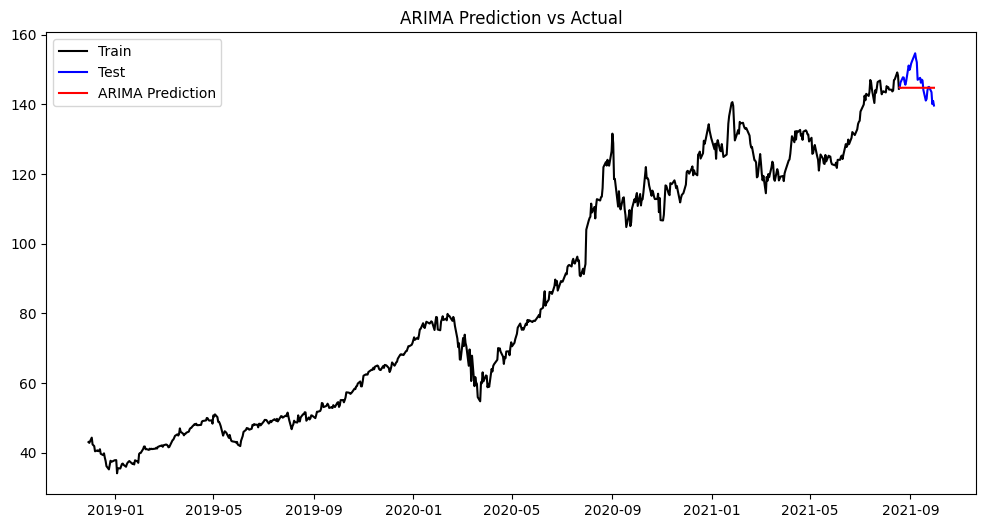

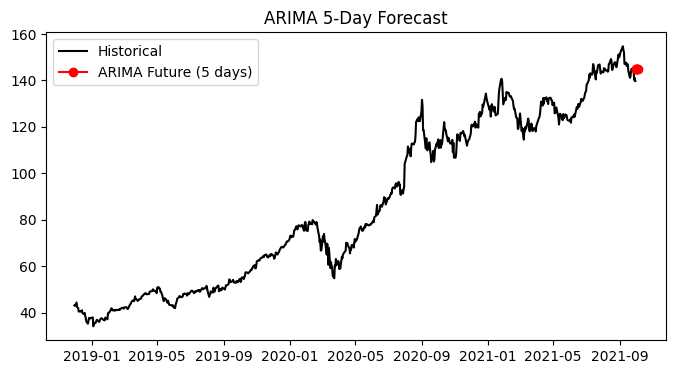

In [33]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Train-test split (last 30 days as test)
train = df['Close'][:-30]
test = df['Close'][-30:]

# Fit ARIMA
arima_model = ARIMA(train, order=(1,1,1))
arima_fit = arima_model.fit()

# Predict on test
arima_pred = arima_fit.forecast(steps=len(test))

# Future forecast (next 5 days)
arima_future = arima_fit.forecast(steps=5)

# Evaluation
print("ARIMA MSE:", mean_squared_error(test, arima_pred))
print("Next 5 days (ARIMA):\n", arima_future)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train", color="black")
plt.plot(test.index, test, label="Test", color="blue")
plt.plot(test.index, arima_pred, label="ARIMA Prediction", color="red")
plt.title("ARIMA Prediction vs Actual")
plt.legend()
plt.show()

# Future forecast plot
plt.figure(figsize=(8,4))
plt.plot(df.index, df['Close'], label="Historical", color="black")
future_index = pd.date_range(start=df.index[-1]+pd.Timedelta(days=1), periods=5, freq='D')
plt.plot(future_index, arima_future, label="ARIMA Future (5 days)", color="red", marker='o')
plt.title("ARIMA 5-Day Forecast")
plt.legend()
plt.show()




### SARIMA FORECAST

SARIMA MSE: 22.59981844904315
Next 5 days (SARIMA):
 684    145.146861
685    144.978742
686    145.571143
687    145.468772
688    145.504775
Name: predicted_mean, dtype: float64


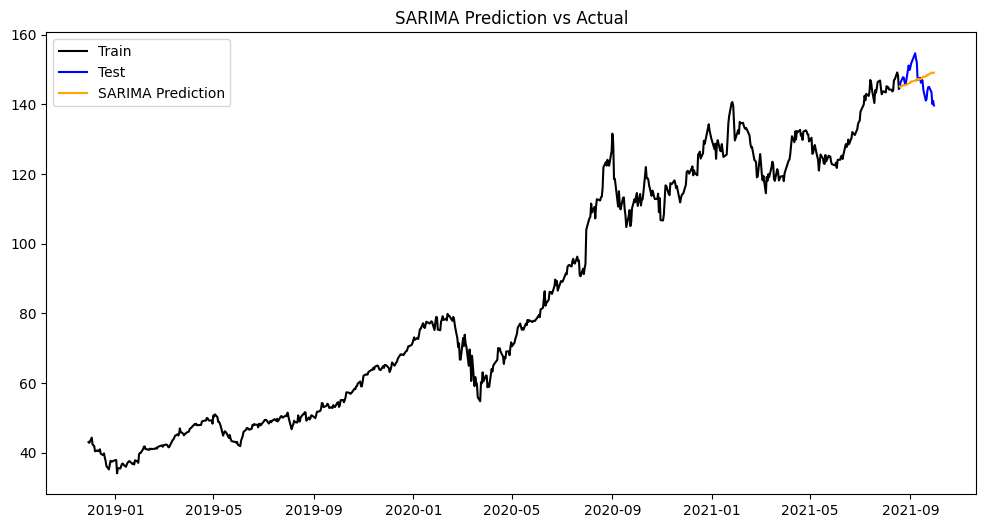

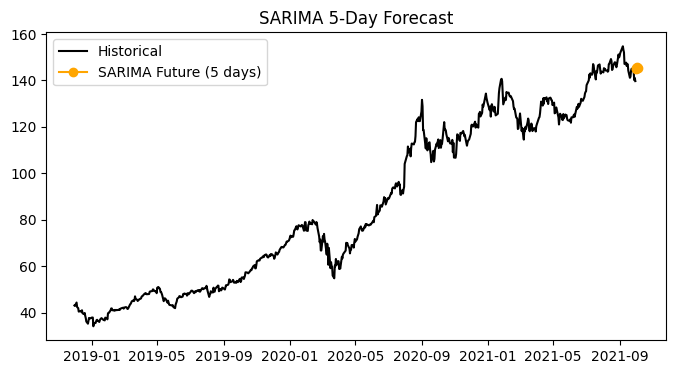

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train-test split
train = df['Close'][:-30]
test = df['Close'][-30:]

# Fit SARIMA
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()

# Predict on test
sarima_pred = sarima_fit.forecast(steps=len(test))

# Future forecast (next 5 days)
sarima_future = sarima_fit.forecast(steps=5)

# Evaluation
print("SARIMA MSE:", mean_squared_error(test, sarima_pred))
print("Next 5 days (SARIMA):\n", sarima_future)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train", color="black")
plt.plot(test.index, test, label="Test", color="blue")
plt.plot(test.index, sarima_pred, label="SARIMA Prediction", color="orange")
plt.title("SARIMA Prediction vs Actual")
plt.legend()
plt.show()

# Future forecast plot
plt.figure(figsize=(8,4))
plt.plot(df.index, df['Close'], label="Historical", color="black")
future_index = pd.date_range(start=df.index[-1]+pd.Timedelta(days=1), periods=5, freq='D')
plt.plot(future_index, sarima_future, label="SARIMA Future (5 days)", color="orange", marker='o')
plt.title("SARIMA 5-Day Forecast")
plt.legend()
plt.show()


### PROPHET FORECAST

In [35]:
from prophet import Prophet

# Prepare Prophet data
prophet_df = df.reset_index()[['Date','Close']].rename(columns={'Date':'ds','Close':'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds']).dt.tz_localize(None)

# Train-test split
prophet_train = prophet_df.iloc[:-30]
prophet_test = prophet_df.iloc[-30:]

# Fit Prophet
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
prophet_model.fit(prophet_train)

# Predict test
future = prophet_model.make_future_dataframe(periods=30, freq='D')
forecast = prophet_model.predict(future)
prophet_pred = forecast.iloc[-30:]['yhat'].values

# Next 5 days forecast
future5 = prophet_model.make_future_dataframe(periods=5, freq='D')
forecast5 = prophet_model.predict(future5)
next_5 = forecast5.tail(5)[['ds','yhat']]

print("Prophet MSE:", mean_squared_error(prophet_test['y'], prophet_pred))
print("Next 5 days (Prophet):\n", next_5)

# Plot test comparison
plt.figure(figsize=(12,6))
plt.plot(prophet_train['ds'], prophet_train['y'], label="Train", color="black")
plt.plot(prophet_test['ds'], prophet_test['y'], label="Test", color="blue")
plt.plot(prophet_test['ds'], prophet_pred, label="Prophet Prediction", color="green")
plt.title("Prophet Prediction vs Actual")
plt.legend()
plt.show()

# Future forecast plot
fig = prophet_model.plot(forecast5)
plt.title("Prophet 5-Day Forecast")
plt.show()


ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True, at position 67

### LSTM FORECAST

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
LSTM MSE: 15.365768806313039
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Next 5 days (LSTM):
 [145.52962 145.21956 145.07507 145.05669 145.13136]


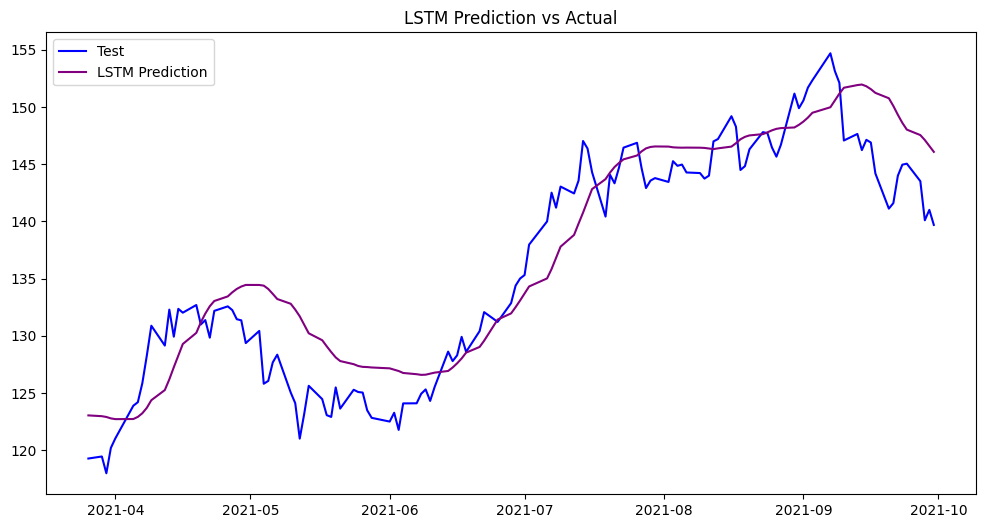

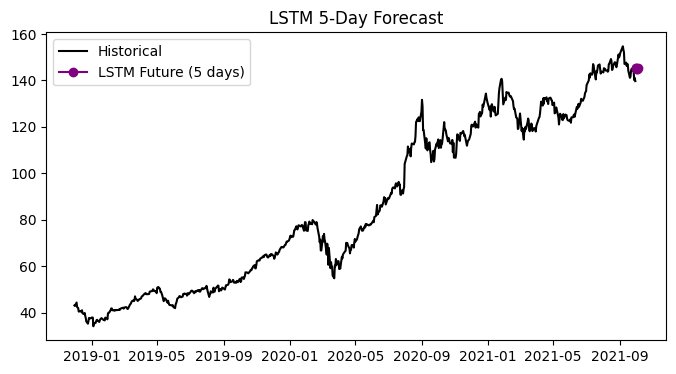

In [36]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Scale
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_close, seq_length)

# Split
split = int(0.8*len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length,1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0)

# Predict test
lstm_pred = model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

print("LSTM MSE:", mean_squared_error(y_test_inv, lstm_pred))

# Forecast next 5 days
last_seq = scaled_close[-seq_length:]
last_seq = last_seq.reshape((1, seq_length, 1))
future_preds = []
for _ in range(5):
    next_val = model.predict(last_seq)[0][0]
    future_preds.append(next_val)
    last_seq = np.append(last_seq[:,1:,:], [[[next_val]]], axis=1)
lstm_future = scaler.inverse_transform(np.array(future_preds).reshape(-1,1))
print("Next 5 days (LSTM):\n", lstm_future.flatten())

# Plot test prediction
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test_inv):], y_test_inv, label="Test", color="blue")
plt.plot(df.index[-len(y_test_inv):], lstm_pred, label="LSTM Prediction", color="purple")
plt.title("LSTM Prediction vs Actual")
plt.legend()
plt.show()

# Future forecast plot
plt.figure(figsize=(8,4))
plt.plot(df.index, df['Close'], label="Historical", color="black")
future_index = pd.date_range(start=df.index[-1]+pd.Timedelta(days=1), periods=5, freq='D')
plt.plot(future_index, lstm_future, label="LSTM Future (5 days)", color="purple", marker='o')
plt.title("LSTM 5-Day Forecast")
plt.legend()
plt.show()
